In [2]:
# use venv from same directory
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


                          TSPAN6  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2  \
barcode_seq                                                                
AAACATCGACATTGGCCGTCTAGG     1.0   2.0    0.0       1.0  0.0  1.0    0.0   
AAACATCGACCTCCAATTGTCTTA     1.0   1.0    0.0       0.0  0.0  0.0    0.0   
AAACATCGAGCAGGAAAGGCGGCA     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
AAACATCGATGCCTAAACTCGTAA     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
AAACATCGCAGCGTTATTGTCTTA     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
...                          ...   ...    ...       ...  ...  ...    ...   
TTCACGCACCGAAGTACGTTCGAG     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
TTCACGCACTCAATGACGCCCGGA     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
TTCACGCAGCCAAGACAAACGATA     0.0   0.0    0.0       0.0  0.0  0.0    0.0   
TTCACGCAGCGAGTAACGCCCGGA     1.0   0.0    0.0       0.0  0.0  2.0    0.0   
TTCACGCAGTCGTAGACGCTTAAA     0.0   0.0    2.0       0.0  0.0  2.0    1.0   

           

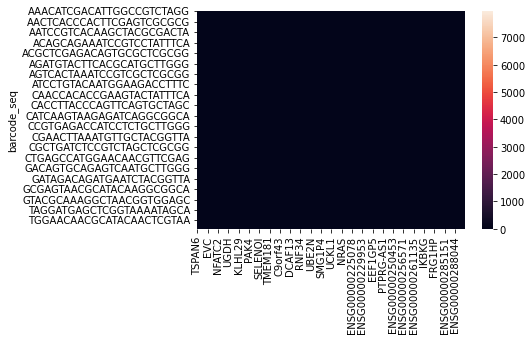

Number of rows (cells): 1143
Number of columns (genes): 29237
Top 10 genes with highest counts: ['ENSG00000278996', 'ENSG00000280441', 'ENSG00000281181', 'ENSG00000280800', 'MT-RNR2', 'HFM1', 'ENSG00000281383', 'MT-RNR1', 'ENSG00000280614', 'ENSG00000289901']


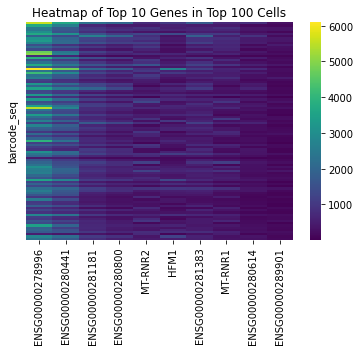

In [ ]:
dir = "../data/SIGNALseq/processed/ex0003_hela_rna_adata.h5ad"
rnaData = sc.read_h5ad(dir)
#INFO: In Signalseq analysis authors seem to have used the gene_name of the gtf file for the final sc-gene matrix
# we will later also use this to correlate gene counts per cell

#plot the data (counts contains the raw counts)
countData = rnaData.to_df(layer = "counts")
print(countData)
sns.heatmap((countData))
plt.show()

# Get number of rows and columns
num_rows, num_columns = countData.shape
print(f"Number of rows (cells): {num_rows}")
print(f"Number of columns (genes): {num_columns}")

# Get the 10 genes with the highest overall counts
top_10_genes = countData.sum(axis=0).nlargest(10).index
print("Top 10 genes with highest counts:", top_10_genes.tolist())
# Get the 100 cells with the highest overall counts
top_100_cells = countData.sum(axis=1).nlargest(100).index

# Subset the data for these top 100 cells
filtered_countData = countData.loc[top_100_cells, top_10_genes]
# Plot heatmap of top 10 genes for top 100 cells
sns.heatmap(filtered_countData, cmap="viridis", xticklabels=True, yticklabels=False)
plt.title("Heatmap of Top 10 Genes in Top 100 Cells")
plt.show()
